In [1]:
from keras.layers import Embedding
from keras.models import Sequential
from keras.datasets import imdb
import keras as K
import numpy as np

Using TensorFlow backend.


In [2]:
max_words = 20000

(train_x, train_y), (test_x, test_y) = imdb.load_data(num_words=max_words)

max_review_length = 80
train_x = K.preprocessing.sequence.pad_sequences(train_x, truncating='pre', padding='pre', maxlen=max_review_length)
test_x = K.preprocessing.sequence.pad_sequences(test_x, truncating='pre', padding='pre', maxlen=max_review_length)

17465344/17464789 [==============================] - 0s 0us/step


In [3]:
model = Sequential()
embedding_length = 5
max_words = 1000
max_sentence_length = 10
model.add(Embedding(max_words, embedding_length, input_length=max_sentence_length))
# the model will take as input an integer matrix of size (batch, input_length).
# the largest integer (i.e. word index) in the input should be
# no larger than max_words-1 (vocabulary size).
# now model.output_shape == (None, max_review_length, embedding_length), where None is the batch dimension.

input_array = input_array = np.random.randint(max_words, size=(2, max_sentence_length)) #train_x[0]
print(input_array, np.shape(input_array))

model.compile('rmsprop', 'mse')
output_array = model.predict(input_array)
#assert output_array.shape == (32, 10, 64)
print(output_array, np.shape(output_array))




[[ 62 886 660 319 585 650 481 375  46 876]
 [793 337 857 771 538 705  90 847 209 241]] (2, 10)







[[[-0.02363584 -0.02943691 -0.00385613 -0.01867272 -0.02832236]
  [ 0.04148836 -0.01826614 -0.01274391  0.0406757   0.04616488]
  [-0.00474282  0.007764   -0.04226415  0.04823562  0.03632728]
  [-0.01493539 -0.00461181  0.02401936 -0.04322114 -0.03856437]
  [-0.01179419 -0.01160015 -0.02624943  0.01984414  0.00887159]
  [-0.00820819  0.02170609  0.01477138  0.03550799 -0.01161573]
  [-0.04407319 -0.01545515  0.04438522  0.01576872  0.03426424]
  [-0.00925282  0.02790571  0.02461853 -0.04815363  0.02892805]
  [ 0.04723699 -0.00221547 -0.04900026 -0.03048369  0.03287113]
  [-0.02819899 -0.02079326  0.04777214 -0.04578748  0.03965982]]

 [[-0.03360357  0.01268836  0.03561432  0.00673747 -0.00445052]
  [ 0.01338046  0.03013924 -0.03132094  0.04875192  0.0378061 ]
  [-0.00733487  0.02159574  0.01009803  0.01153467  0.04113375]
  [ 0.01752121 -0.03030791  0.00863419 -0.02715805 -0.0081255

In [4]:
#one hot representation
from keras.preprocessing.text import one_hot

#define documents
docs = ['glass of orange juice',
        'bottle of mango juice',
        'glass of mango shake',
        'drink bottle of banana shake',
        'I want a glass of cold water',
        'The king and the queen',
        'man and woman']

vocab_size = 10000

encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)

[[7520, 9808, 9151, 8755], [9591, 9808, 1682, 8755], [7520, 9808, 1682, 8865], [3326, 9591, 9808, 6502, 8865], [903, 4209, 4441, 7520, 9808, 3311, 8056], [9450, 7376, 2248, 9450, 7527], [8669, 2248, 4906]]


In [5]:
#Word Embedding

from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM

import numpy as np

embedding_length = 5
max_doc_len = 10

encoded_docs = pad_sequences(encoded_docs, truncating='post', padding='post', maxlen=max_doc_len)

print(encoded_docs)

[[7520 9808 9151 8755    0    0    0    0    0    0]
 [9591 9808 1682 8755    0    0    0    0    0    0]
 [7520 9808 1682 8865    0    0    0    0    0    0]
 [3326 9591 9808 6502 8865    0    0    0    0    0]
 [ 903 4209 4441 7520 9808 3311 8056    0    0    0]
 [9450 7376 2248 9450 7527    0    0    0    0    0]
 [8669 2248 4906    0    0    0    0    0    0    0]]


In [6]:
model = Sequential()

model.add(Embedding(vocab_size, embedding_length, input_length=max_doc_len))
model.add(LSTM(units=64))
model.compile('rmsprop', 'mse')
model.summary()
output = model.predict(encoded_docs)
print(output.shape)
print(output)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 10, 5)             50000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                17920     
Total params: 67,920
Trainable params: 67,920
Non-trainable params: 0
_________________________________________________________________
(7, 64)
[[-5.56378253e-03  5.60367433e-03 -5.16801467e-03  4.19320306e-03
  -3.59169557e-03  4.13992954e-03 -8.22615996e-03  9.79942270e-04
   6.38592523e-04 -5.68409101e-04 -4.02601995e-03  1.24315266e-04
  -6.68045424e-04  2.15857592e-03  2.78725405e-03 -2.08628061e-03
   8.75103381e-03 -6.65520609e-04 -1.90308597e-03  1.26623060e-03
  -2.13643925e-05  3.88333411e-03  4.30517318e-03  6.38288492e-03
  -4.03438276e-03  1.41671323e-03 -7.21365621e-04  3.49342963e-03
  -1.67642382e-03 -2.63169291e-03  5.00983

In [7]:
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

max_words = 20000

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [8]:
# cut texts after this number of words (among top max_features most common words)
max_review_length = 80

x_train = sequence.pad_sequences(x_train, truncating='pre', padding='pre', maxlen=max_review_length)
x_test = sequence.pad_sequences(x_test, truncating='pre', padding='pre', maxlen=max_review_length)

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (25000, 80)
x_test shape: (25000, 80)


In [9]:
print('Build model...')
embedding_length = 64
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_length, input_length=max_review_length))
model.add(LSTM(units=64, input_shape=(max_review_length, embedding_length), return_sequences=False, unroll=True))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Build model...

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 80, 64)            1280000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 1,313,089
Trainable params: 1,313,089
Non-trainable params: 0
_________________________________________________________________


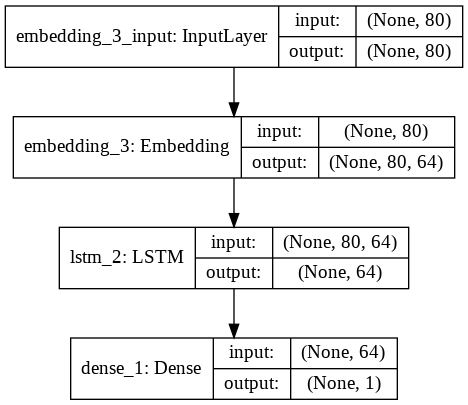

In [10]:
#Visualize
model.summary()

from keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='sent_analysis_model.png')

In [11]:

print('Training...')
batch_size = 32

model.fit(x_train, y_train,
          batch_size = batch_size,
          epochs=10,
          validation_data = (x_test, y_test))

Training...


Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 84s 3ms/step - loss: 0.4267 - acc: 0.7999 - val_loss: 0.3656 - val_acc: 0.8425
Epoch 2/10
25000/25000 [==============================] - 61s 2ms/step - loss: 0.2516 - acc: 0.8993 - val_loss: 0.3883 - val_acc: 0.8350
Epoch 3/10
25000/25000 [==============================] - 62s 2ms/step - loss: 0.1631 - acc: 0.9382 - val_loss: 0.4208 - val_acc: 0.8218
Epoch 4/10
25000/25000 [==============================] - 62s 2ms/step - loss: 0.1113 - acc: 0.9589 - val_loss: 0.5395 - val_acc: 0.8234
Epoch 5/10
25000/25000 [==============================] - 61s 2ms/step - loss: 0.0757 - acc: 0.9735 - val_loss: 0.7736 - val_acc: 0.8120
Epoch 6/10
25000/25000 [==============================] - 61s 2ms/step - loss: 0.0546 - acc: 0.9809 - val_loss: 0.7152 - val_acc: 0.8192
Epoch 7/10
25000/25000 [==============================] - 62s 2ms/step - loss: 0.0362 - acc: 0.9887 - val_loss: 0.

In [12]:
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print(f'Test score = {score}')
print(f'Test accuracy = {acc}')

25000/25000 [==============================] - 9s 348us/step
Test score = 0.8758461359870434
Test accuracy = 0.81432


In [17]:
#review = "The movie was a great waste of time."
review = "It was a great movie."
print(f'New review = {review}')

d = imdb.get_word_index()
words = review.split()
review = []

for word in words:
  if word not in d:
    review.append(2)
  else:
    review.append(d[word] + 3)
  
print(f"review = {review}")

review = sequence.pad_sequences([review], truncating='pre', padding='pre', maxlen=80)

prediction = model.predict(review)
print(f'Prediction (0 = Negative, 1 = positive) = {prediction}')

New review = It was a great movie.
review = [2, 16, 6, 87, 2]
Prediction (0 = Negative, 1 = positive) = [[0.98290735]]
